# Assignment 1
## Applied Machine Learning (BUAN 6341)

### <font color='red'>Due Date: February 15, 2022 11:59pm</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file.
- Write down your codes and discussions in the given cells described in this file.
    - Cells for coding are denoted as "YOUR CODE HERE" 
    - Cells for discussions are denoted as "YOUR DISCUSSIONS HERE". Include "#" before each line of your discussions to comment out your wordings (i.e., not considered as code).
    - If you need more cells to check temporary results, add a cell using the "+" button or shortcut "esc + b".
- Submit two files: .pdf and .ipynb to eLearning.


In [128]:
NAME = "Anagha Sanjay Bhole"

### Meet the Data and the Setting

##### Background  
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

##### Practice Prep
The cells below imports basic packages as well as the bike-sharing dataset. The original dataset is loaded as Pandas DataFrame, and is named as 'daily'. Run and read through the cells below to obtain a general understanding of the data.

In [129]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [130]:
import pandas as pd
daily = pd.read_csv("/Users/anaghabhole/Downloads/day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [131]:
print(daily.columns)

Index(['day', 'season', 'weekday', 'workingday', 'weathersit', 'temp',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


**Question 1 : Data Exploration.** (12 points)

- Plot the daily count of bikes that were checked out by **casual/non-registered** users (y) against the temperature (x). 
- Set the color based on whether it is a working day. Set transparency to 0.7. 
- Include appropriate labels for x-axis and y-axis, and colorbar. *Hint: use plt.colorbar(ticks = [0,1]) to change the ticks.*
- What insights can you get?

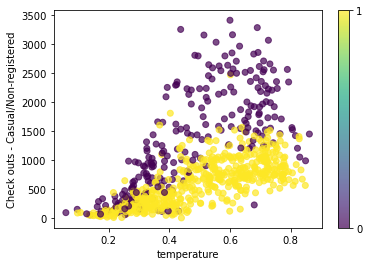

In [145]:
## YOUR CODE HERE ##

x = daily['temp']
y = daily['casual']

plt.scatter(x,y, c = daily['workingday'], alpha = 0.7)
plt.xlabel("temperature")
plt.ylabel("Check outs - Casual/Non-registered")
plt.colorbar(ticks = [0,1])
plt.show()

In [133]:
## YOUR DISCUSSION HERE ##

# Yellow - Working day
# Purple - Holiday

# Insights:

# 1. As the temperature increases, the count of casually checked out bikes also increases.
# 2. The count of casually checked out bikes is more on the Holidays than on the working days.

## Regression

In this section, you are supposed to complete TWO regression models, some in conjunction with grid search and CV. First, run the cells below to complete the data splitting step. 

In [134]:
# Define X and y
var = ['temp','windspeed','season', 'weekday', 'workingday', 'weathersit']
X = daily[var]
y = daily['cnt']

In [135]:
# Data splitting for training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Question 2: Linear Regression**

- Train a linear regression model. Report and specify clearly the estimated coefficients and intercept.   
  *Hint: use print("The intercept is:", INTERCEPT_RSLT) to specify the result reported is the intercept.*
- Obtain the predicted y for (1) test set and (2) training set. Store the results properly.
- Calculate and use print function to report (1) the MSE for test set and (2) the MSE for training set.
- We have obtained two MSE values. Which one should we report as the unbiased performance measure?
- Can you propose other potential measures for the model's performance? 
  *(Discussion only. No need to obtain the measure's value)*

In [136]:
# Train the model and report coefficients
# YOUR CODE HERE 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
print("The intercept is:", lr_model.intercept_) 
print("The coefficient is:", lr_model.coef_) 


The intercept is: 2093.4087280168737
The coefficient is: [ 5245.48567189 -1995.73565252   412.66281476    76.77426589
   132.20982981  -800.60943777]


In [137]:
## Predict y for training and test set
# YOUR CODE HERE

y_test_pred = lr_model.predict(X_test)
y_train_pred = lr_model.predict(X_train)

In [146]:
## Calculate and report the MSE for training and test
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error

#MSE for Test set
mse_test = np.abs(mean_squared_error(y_test, y_test_pred))
rmse_test = np.sqrt(mse_test)
print("Mean Square Error - Test: {}".format(mse_test))

#MSE for Train set
e = y_train - y_train_pred
mse_train = np.sum(e**2)/y_train.shape[0]
rmse_train = np.abs(np.sqrt(mse_train))
print("Mean Square Error - Train: {}".format(mse_train))

Mean Square Error - Test: 1816812.3742340659
Mean Square Error - Train: 1852849.437356907


In [118]:
## Discussion: Which is the unbiased performance measure? Can you propose other performance measures?

# The unbiased performance measure is mse_test. If we predict the values of the training set using this model,
# the model will score better on the MSE as the data is known to the model. The test set however, is unknown
# to the model and hence will give unbiased results.

# Other performance measures are RMSE(root mean squared error), MAE(Mean Absolute Error), R-square, Adjusted R-square

**Question 3: Polynomial Regression**

- Train a Polynomial regression model with grid search and 10-fold cross-validation. Let the grid of the hyperparameter be: [1,2,3]. Leave other parameters as default.
- Report the hyperparameter chosen (i.e., the degree selected) and the mean of validation score of the chosen model.
- Obtain the chosen model's unbiased performance (based on default measure, R-squared).

In [119]:
# Train the model, and report the results
# YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


param_poly = {'polynomialfeatures__degree' :  range(1,4)  }

# S2. Define estimator: use make_pipeline to combine two functions. 

lr_param = LinearRegression()
poly_param = PolynomialFeatures()

pipe_param = make_pipeline(poly_param, lr_param)

# S3. Define GridSearchCV Estimation function, then train the model

grid_poly = GridSearchCV(pipe_param, param_poly, cv = 10)
grid_poly.fit(X_train, y_train)

print("Mean validation score of the best model: {}".format(grid_poly.best_score_))
print("Hyperparameter chosen: {}".format(grid_poly.best_params_))
print("Model's unbiased performance - R squared: {}".format(grid_poly.score(X_test, y_test)))
print("Time & Score of each hyperparameter, each iteration: {}".format(grid_poly.cv_results_))

Mean validation score of the best model: 0.46151790928788133
Hyperparameter chosen: {'polynomialfeatures__degree': 1}
Model's unbiased performance - R squared: 0.5285823895780064
Time & Score of each hyperparameter, each iteration: {'mean_fit_time': array([0.00393023, 0.00205739, 0.00316606]), 'std_fit_time': array([0.00183139, 0.00028243, 0.0004597 ]), 'mean_score_time': array([0.00142686, 0.00081167, 0.00100675]), 'std_score_time': array([0.00035935, 0.00011406, 0.00054547]), 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'polynomialfeatures__degree': 1}, {'polynomialfeatures__degree': 2}, {'polynomialfeatures__degree': 3}], 'split0_test_score': array([0.32614579, 0.42296377, 0.44880339]), 'split1_test_score': array([0.45295325, 0.62418979, 0.63896038]), 'split2_test_score': array([ 0.49771732,  0.37486243, -0.08271642]), 'split3_test_score': array([0.58621828, 0.3